# Описание проекта

Нам повезло работать в одном из лучших банков страны «Метанпромбанк».  
Однако нам предстоит разобраться в анализе оттока клиентов регионального банка.  
Проведем предобработку данных, а затем исследовательский анализ данных, определим все значимые
признаки отточности.

Сформулируем и проверим гипотезы:
- Город проживания может влиять на склонность к оттоку (например, жители Ярославля и небольших городов могут вести себя по-разному).
- Клиенты, которые пользуются более чем одним продуктом, реже уходят.
- Клиенты с низким кредитным скорингом склонны к оттоку.

После проверки гипотез мы выделим категорию клиентов, которые обладают высокой склонностью к оттоку для более детального анализа и разработки рекомендаций.
В конце, на основе анализа мы предоставим выводы, а также разработаем рекомендации для данного случая.

# Цель проекта:
Основная цель данного проекта - проанализировать поведение клиентов банка, выявить ключевые факторы, влияющие на их отток, и предложить сегментацию клиентов на основе этих факторов. Анализ позволит сформулировать рекомендации для улучшения удержания клиентов и минимизации оттока.

# Описание данных:

Анализ проводится на основе данных о клиентах регионального банка "Метанпром", который расположен Ярославле и областных городах: Ростов Великий и Рыбинск.  
Датасет содержит следующие параметры:  

USERID — идентификатор пользователя.  
score — баллы кредитного скоринга.  
city — город проживания клиента (Ярославль, Ростов Великий, Рыбинск).  
gender — пол клиента.  
age — возраст клиента.  
equity — количество баллов собственности.  
balance — баланс на счете клиента.  
products — количество продуктов, которыми пользуется клиент.  
credit_card — наличие кредитной карты.  
last_activity — активность клиента.  
EST_SALARY — оценочный доход клиента.  
churn — признак оттока клиента (ушел или остался).  

# Изучение общих и сырых поступивших данных

In [293]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import resources
from phik.report import plot_correlation_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [295]:
url = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

In [296]:
data = pd.read_csv(url)
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Мы вывели датасет с 10000 логами  и 12 колонками. 

В нашем логе указано:  
user_id — идентификатор пользователя;  
score — баллы кредитного скоринга,  
city — город,  
gender — пол,  
age — возраст,  
equity — количество баллов собственности,  
balance — баланс на счёте,  
products — количество продуктов, которыми пользуется клиент,  
credit_card — есть ли кредитная карта,  
last_activity — активный клиент,  
EST_SALARY — оценочный доход клиента,  
сhurn — признак оттока.

# 1. Подготовка и обработка данных

In [297]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Здесь мы поменяли название некоторых столбцов, согласно правилу хорошего стиля.

In [298]:
data['city'] = data['city'].str.lower()
data['gender'] = data['gender'].str.lower()

print(data)

      user_id  score       city gender   age  equity     balance  products  \
0      183012  850.0    рыбинск      ж  25.0       1    59214.82         2   
1      146556  861.0    рыбинск      ж  37.0       5   850594.33         3   
2      120722  892.0    рыбинск      ж  30.0       0         NaN         1   
3      225363  866.0  ярославль      ж  51.0       5  1524746.26         2   
4      157978  730.0  ярославль      м  34.0       5      174.00         1   
...       ...    ...        ...    ...   ...     ...         ...       ...   
9995   120553  814.0    рыбинск      м  27.0       1    78144.65         1   
9996   139170  894.0  ярославль      м  46.0       0         NaN         1   
9997   115639  903.0  ярославль      м  24.0       0         NaN         2   
9998   148700  777.0  ярославль      ж  68.0       3   865457.97         3   
9999    96267  828.0    рыбинск      ж  58.0       3  1180886.70         4   

      credit_card  last_activity  est_salary  churn  
0        

Также мы изменили регистр в столбце город и пол для удобства проводимого в дальнейшем анализа.

## Проверим пропуски и типы данных.

In [299]:
data.info()

print("Пропущенные значения в balance:")
print(data['balance'].isnull().sum())
print("\nПропущенные значения в products:")
print(data['products'].isnull().sum())
print("\nПропущенные значения в age:")
print(data['age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
Пропущенные значения в balance:
2295

Пропущенные значения в products:
0

Пропущенные значения в age:
26


В нашем датасете есть два интересующих столбца, в которм важна информация по пропускам.
Это balance, products и age.  
В столбце balance мы выявили 2295 пропущенных значений.  
В столбце age мы выявили 26 пропущенных значений.  
В столбце products пропущенные значения отстуствуют.  

Типы данных в датафрейме:
- user_id
- equity
- products
- credit_card
- last_activity
- churn,   
являются типом int64.  
___
- score
- age
- balance
- est_salary,   
являются типом float64.  
___  
- city
- gender,   
являются типом object.  


## Заменим пропущенные значения

Заменим пропущенные значения в столбце balance на 0

In [300]:
data['balance'].fillna(0, inplace=True)

Далее изучим, есть ли выбросы в столбце balance

In [301]:
print(data['balance'].describe())

count    1.000000e+04
mean     6.378155e+05
std      1.773030e+06
min      0.000000e+00
25%      6.084606e+04
50%      3.758789e+05
75%      8.027422e+05
max      1.191136e+08
Name: balance, dtype: float64


В столбце balance действительно есть выбросы

In [302]:
lower_limit = data['balance'].quantile(1)
upper_limit = data['balance'].quantile(0.99)
data['balance'] = data['balance'].clip(upper=upper_limit)
print(data['balance'].describe())

count    1.000000e+04
mean     5.804785e+05
std      7.222623e+05
min      0.000000e+00
25%      6.084606e+04
50%      3.758789e+05
75%      8.027422e+05
max      4.310126e+06
Name: balance, dtype: float64


Мы избавились как от мелких, так и от крупных показателей и выбросов, но сохранили остальное распределение.

In [303]:
data = data.dropna(subset=['age'])

Произвели удаление пустых значений в age.  
В данном стобце всего 26 строк с пропущенным возрастом (из 10 000 строк). Удаленные данные не сильно повлияет на результат анализа.

In [304]:
unique_products = data['products'].unique()
print(unique_products)

[2 3 1 4 5 0]


Согласно нашему датасету, у каждого клиента есть от 0 до 5 продуктов нашего банка. 

In [305]:
data = data[data['products'] != 0]
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,рыбинск,ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,рыбинск,ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,рыбинск,ж,30.0,0,0.00,1,1,1,107683.34,0
3,225363,866.0,ярославль,ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,ярославль,м,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,рыбинск,м,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,ярославль,м,46.0,0,0.00,1,1,0,196898.29,0
9997,115639,903.0,ярославль,м,24.0,0,0.00,2,1,1,108905.09,0
9998,148700,777.0,ярославль,ж,68.0,3,865457.97,3,0,1,86874.90,0


Удалим строчку, где у user_id было 0 продуктов, поскольку это нерепрезентативные данные.

In [306]:
unique_products = data['products'].unique()
print(unique_products)

[2 3 1 4 5]


Убедились в том, что теперь у нас нет клиентов, у которых 0 продуктов. 

In [307]:
min_data_age = data['age'].min()
max_data_age = data['age'].max()

print(min_data_age)
print(max_data_age)

18.0
86.0


Убедились, что возраст клиентов банка от 18 до 86.

## Построение распределений ключевых признаков.

Необходимо понять как распределены значения по основным признакам (возраст, баланс, доход и т.д.)

<function matplotlib.pyplot.show(close=None, block=None)>

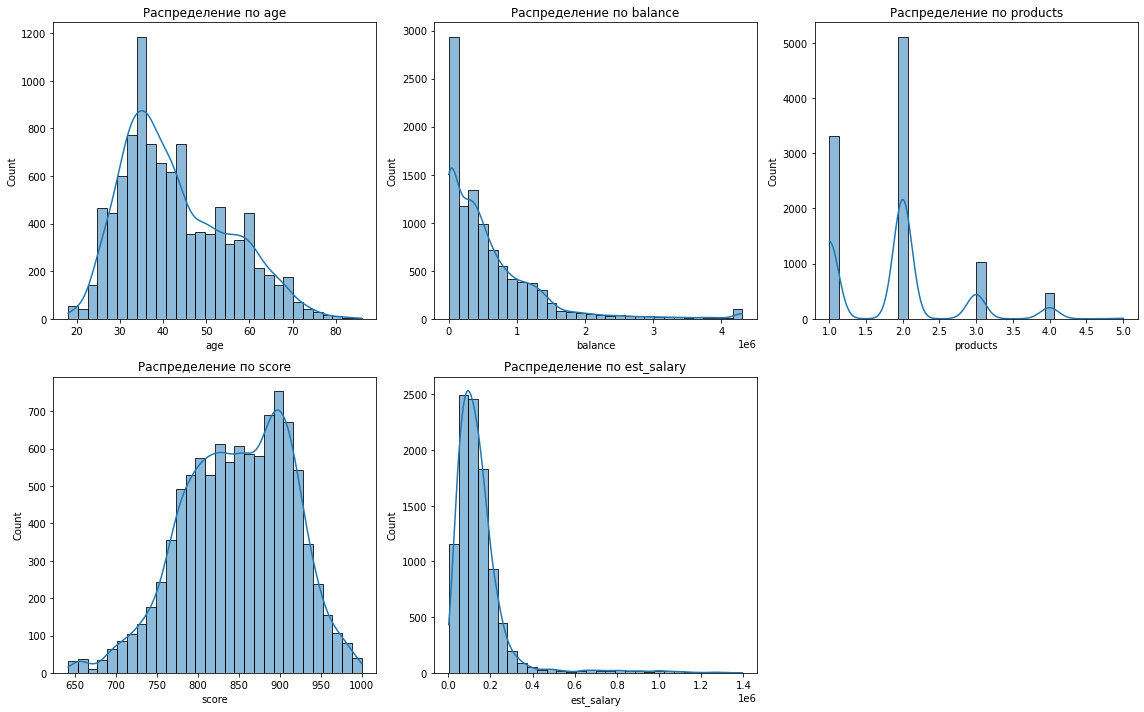

In [308]:
numerical_columns = ['age', 'balance', 'products', 'score', 'est_salary']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,3,i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Распределение по {col}')
plt.tight_layout()
plt.show

**Вывод по данным визуализациям:**  
1) большинство клиентов в возрасте от 30 до 40 лет, с пиковым значением на 35 лет. Наибольшее количество клиентов от 26 до 60. Наименьшее количество клиентов банка 18-22 и 60+.  
2) большинство клиентов имеют совокупный баланс от 200 тыс. до 1 млн.   
3) большинство клиентов в среднем имеют два продукта в банке. следом за ним идут показатели, указывающие на 1 продукт.  
4) наибольшая концентрация кредитных скорингов находится в диапазоне от 700 до 860. возможно это говорит о стабильности и платежеспособности клиентов (либо лояльной и устаревшей/недоработанной score-системе).  
5) большинство клиентов с доходом от 100 до 200 тыс. Поскольку города небольшие, то эти данные считаю завышенными, вследствии непорядочности клиентов указывать истинно верный доход. Но данный вопрос не в нашей компетенции.   

Теперь визуализируем категориальные признаки: город, пол.

<function matplotlib.pyplot.show(close=None, block=None)>

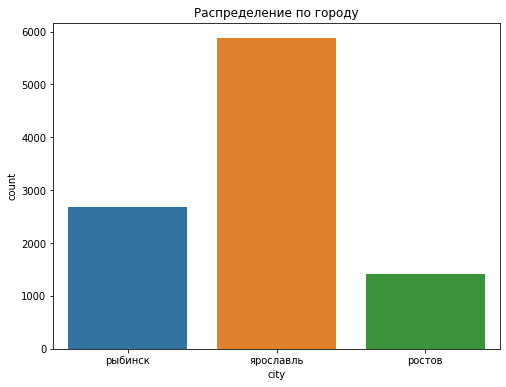

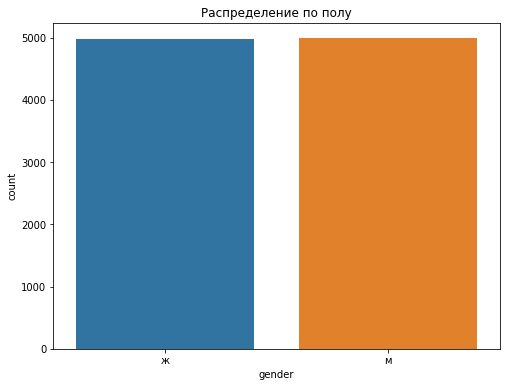

In [309]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='city')
plt.title('Распределение по городу')
plt.show

plt.figure(figsize=(8,6))
sns.countplot(data=data, x='gender')
plt.title('Распределение по полу')
plt.show

**Выводы по этим графикам следующие:**  
1) большинство клиентов из Ярославля ~ 6 тыс.  
2) следом идет город Рыбинск ~ 2.8 тыс.  
3) замыкает список клиенты из Ростова ~ 2 тыс.  

График распределения по полу составляет практически 1:1.

Построим корреляционную матриу для числовых признаков. 
Это может нам понять как они связаны друг с другом и оттоком.

<function matplotlib.pyplot.show(close=None, block=None)>

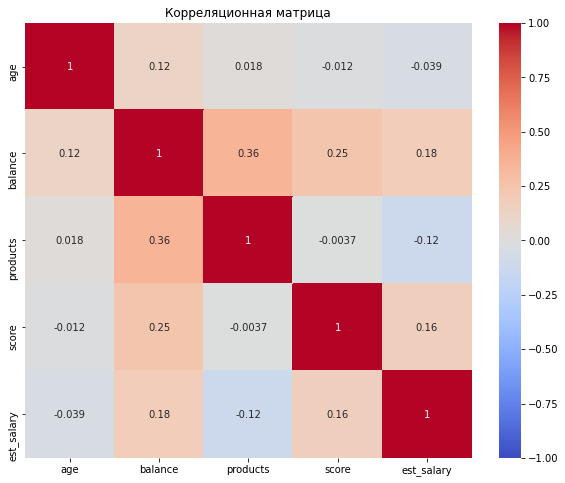

In [310]:
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show

**Вывод по корреляционной матрице:**  
1) корреляция между балансом и кредитным скорингом составляет 0.14.Скорее всего это из-за того, что клиенты с более высоким балансом могут иметь слегка более высокий кредитный скоринг (но 0.14 это не такая сильная зависимость).  
2) корреляция между балансом и количеством продуктов составляет 0.16. Возможно это тоже слабая положительная корреляция, вероятно из-за того, что клиенты с более высоким балансом часто пользуются несколькими банковскими продуктами (но из-за 0.16 корреляции это не сильно выражается).  
3) корреляция между кредитным скорингом и оценочным доходом составляет -0.12. Очередная слабая отрицательная корреляция, что означает, что клиенты с более высоким кредитным скорингом могут иметь немного более низкий доход.  
4) самая высокая корреляция — с балансом (0.066), что указывает на то, что возраст клиентов не сильно влияет на их баланс, количество продуктов, кредитный скоринг или оценочный доход.  

Примененим phik для категориальных данных. 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x720 with 0 Axes>

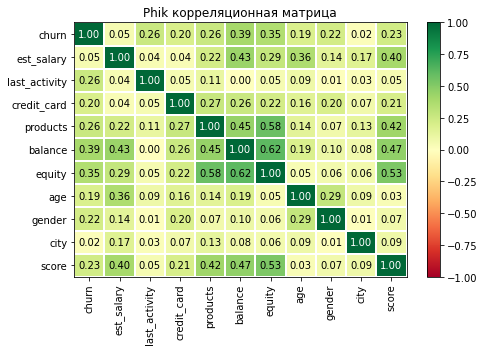

In [311]:
data_no_id = data.drop(columns=['user_id'])

phik_matrix = data_no_id.phik_matrix(interval_cols=['age', 'balance', 'products', 'score', 'est_salary'])

plt.figure(figsize=(12, 10))
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index,vmin=-1, vmax=1)
plt.title('Phik корреляционная матрица')
plt.show

*Мы исключили user_id bp анализа, поскольку выдавало ошибку.  
Порывшысь в источниках, мы пришли к выводу, что данный столбец не является информативным и его следует исключить.*

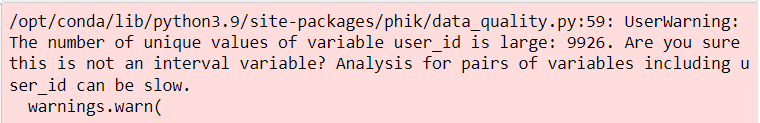

Построение тепловой карты с корреляциями.

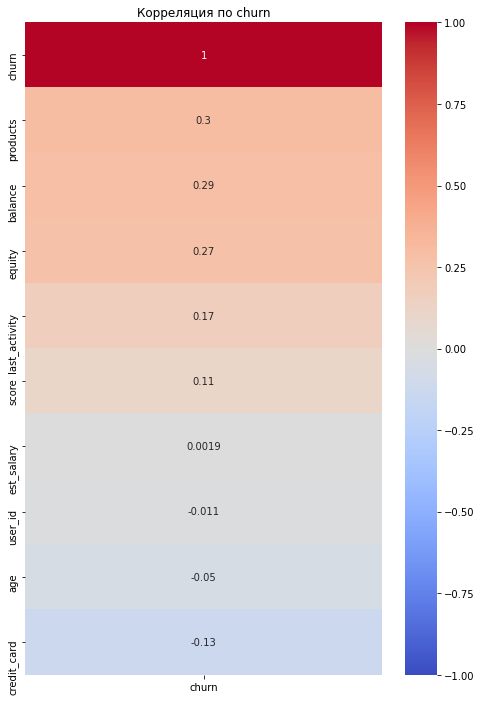

In [312]:
churn_corr = data.corr()['churn'].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция по churn')
plt.show()

**Вывод по данной матрице:**  
1) данные показывают, что клиенты, у которых много продуктов в этом банке как раз-таки склонны к оттоку. Здесь может быть множество гипотез, почему так, но это уже другой предмет для рассмотрения.  
2) а вот возраст и оценочный доход как раз не влияют на склонность к оттоку клиентов из банка.

# 2. Проверка гипотез и их визуализация. 

Гипотеза 1: Влияет ли город проживания на склонность к оттоку.
Проверим, есть ли значимые различия в оттоке клиентов между жителями разных городов.

T-тест различий между Ярославлем и Ростовом: Ttest_indResult(statistic=0.25776748241993935, pvalue=0.7966109365520193)
T-тест различий между Ярославлем и Рыбинском: Ttest_indResult(statistic=3.1411828981426564, pvalue=0.0016916054642913763)


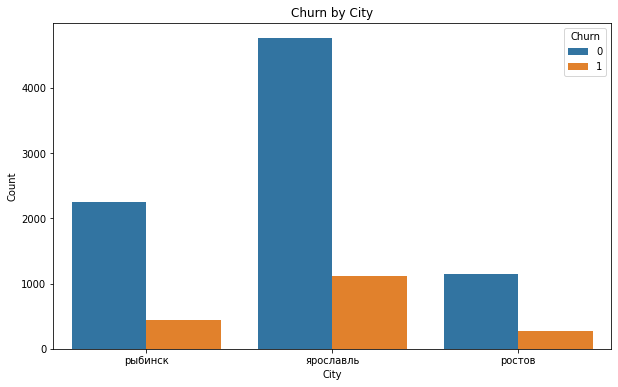

In [313]:
yaroslavl = data[data['city'] == 'ярославль']['churn']
rostov = data[data['city'] == 'ростов']['churn']
rybinsk = data[data['city'] == 'рыбинск']['churn']

# Ярославль и Ростов
ttest_yar_rost = stats.ttest_ind(yaroslavl, rostov, equal_var=False)
print('T-тест различий между Ярославлем и Ростовом:', ttest_yar_rost)

# Ярославль и Рыбинск
ttest_yar_ryb = stats.ttest_ind(yaroslavl, rybinsk, equal_var=False)
print('T-тест различий между Ярославлем и Рыбинском:', ttest_yar_ryb)

plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='churn', data=data)
plt.title('Churn by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

**Вывод:**  
*между Ярославлем и Ростовом*,
мы не можем отвергнуть нулевую гипотезу, что отток клиентов в этих двух городах одинаков. А это означает, что нет больших различий в поведении клиентов, связанных с оттоком, между этими городами.  
*между Ярославлем и Рыбинском*,
поведение клиентов в Ярославле и Рыбинске значительно отличается в контексте склонности к оттоку. Наверное в Рыбинске клиенты более склонны к оттоку или же наоборот, реже уходят, чем в Ярославле.

Гипотеза 2: Клиенты, которые пользуются одним продуктом реже уходят.

Т-тест различий между одним продуктом и более одного продукта: Ttest_indResult(statistic=-24.39093143481919, pvalue=1.4835317277253565e-127)


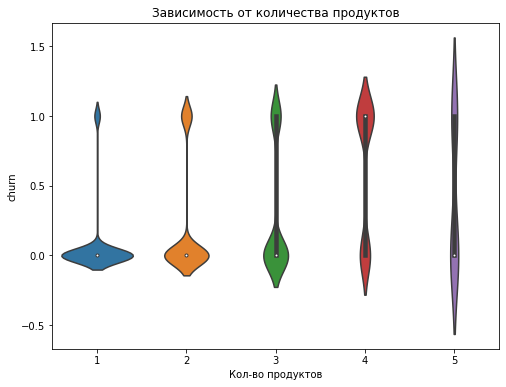

In [314]:
one_product = data[data['products'] == 1]['churn']
more_than_one_product = data[data['products'] > 1]['churn']

ttest_products = stats.ttest_ind(one_product, more_than_one_product, equal_var=False)
print('Т-тест различий между одним продуктом и более одного продукта:', ttest_products)

plt.figure(figsize=(8,6))
sns.violinplot(x='products', y='churn', data=data, split=True)
plt.title('Зависимость от количества продуктов')
plt.xlabel('Кол-во продуктов')
plt.ylabel('churn')
plt.show()

**Вывод:**  
клиенты с одним продуктом имеют более высокий уровень оттока по сравнению с клиентами, нежели чем те, кто пользуется более чем одним продуктом.

Гипотеза 3: Склонны ли клиенты с низким кредитным скоррингом к оттоку

Т-тест между низким и высоким кредитным скорингом: Ttest_indResult(statistic=-10.177350273401537, pvalue=3.310965618770074e-24)


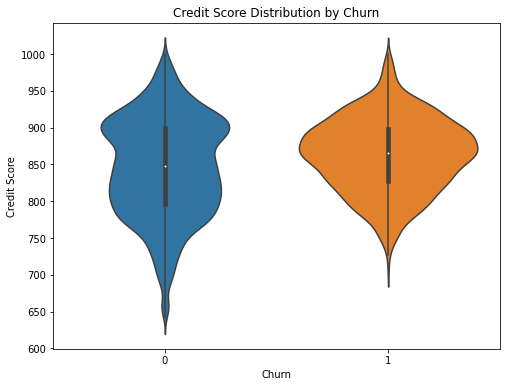

In [315]:
low_score = data[data['score'] < data ['score'].median()]['churn']
high_score = data[data['score'] >= data ['score'].median()]['churn']

ttest_score = stats.ttest_ind(low_score, high_score, equal_var=False)
print('Т-тест между низким и высоким кредитным скорингом:', ttest_score)

plt.figure(figsize=(8, 6))
sns.violinplot(x='churn', y='score', data=data)
plt.title('Credit Score Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

**Вывод:**  
очевидно наблюдается, что клиенты с низким кредитным скорингом более склонны к оттоку по сравнению с клиентами, у которых высокий кредитный скоринг, поэтому они в группе риска у банка.

# 3. Cегментация клиентов 

Сначала стандартизируем данные

In [316]:
features = ['score', 'products', 'balance', 'age']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [317]:
kmeans = KMeans(n_clusters=3, random_state=42)

data['cluster'] = kmeans.fit_predict(data_scaled)

Оценим количество клиентов в каждом кластере

In [319]:
print(data['cluster'].value_counts())

0    4344
1    3588
2    2041
Name: cluster, dtype: int64


Теперь исследуем средние значения признаков для каждого кластера

In [320]:
print(data.groupby('cluster')[['score', 'products', 'balance', 'age']].mean())

              score  products       balance        age
cluster                                               
0        790.528085  1.837707  3.957414e+05  43.459945
1        899.361761  1.415273  2.794286e+05  39.319398
2        883.309162  2.746203  1.506069e+06  47.175894


Исследуем связь кластеров с оттоком

In [321]:
print(data.groupby('cluster')['churn'].mean())

cluster
0    0.120626
1    0.129877
2    0.405683
Name: churn, dtype: float64


# 4. Выводы по проекту.

**1. Цель проекта:**  

    Проанализировать поведение клиентов банка, выявить ключевые факторы, влияющие на отток, и предложить сегментацию клиентов на основе этих факторов. На основе анализа были сформулированы рекомендации для улучшения удержания клиентов и минимизации оттока.  
    
**2. Выполненные шаги:**  

    Исследовательский анализ данных: Были проанализированы ключевые показатели клиентов, такие как возраст, баланс, количество продуктов, кредитный скоринг и оценочный доход.
    Корреляционный анализ: Оценены взаимосвязи между различными признаками, чтобы выявить ключевые факторы, влияющие на отток.
    Проверка гипотез с помощью t-тестов: Были проверены гипотезы о влиянии города проживания, количества продуктов и кредитного скоринга на склонность к оттоку.
    Кластеризация: Клиенты были сегментированы на три группы (кластера) на основе их кредитного скоринга, баланса, количества продуктов и возраста.
    Анализ оттока по сегментам: Проведена оценка уровня оттока для каждого кластера, чтобы выявить группы риска.  

**3. Главные выводы:**   
    
    Демографический анализ:  
    Большинство клиентов банка — это люди в возрасте от 30 до 40 лет, с пиковым значением на 35 лет.  
    Большая часть клиентов имеет совокупный баланс от 200 тыс. до 1 млн.  
    В среднем клиенты пользуются двумя продуктами, но также есть значительное количество клиентов с одним продуктом.  
    Основная масса клиентов имеет кредитный скоринг в диапазоне от 700 до 860, что свидетельствует о стабильности их кредитных возможностей.  
    Большинство клиентов имеют доход от 100 до 200 тыс., что может быть завышенным показателем из-за ненадежности указанных данных.  

    Анализ по городам:  
    Ярославль имеет наибольшее количество клиентов (~6 тыс.), за ним следует Рыбинск (~2.8 тыс.), и замыкает список Ростов (~2 тыс.).  
    Распределение по полу практически 1:1, что говорит о равномерном распределении клиентов по гендерному признаку.  

    Корреляционный анализ:  
    Корреляция между балансом и кредитным скорингом (0.14) и между балансом и количеством продуктов (0.16) слаба, что указывает на слабую взаимосвязь этих факторов.  
    Негативная корреляция между кредитным скорингом и оценочным доходом (-0.12) предполагает, что клиенты с высоким скорингом могут иметь немного более низкий доход.  
    Возраст практически не влияет на баланс, количество продуктов или кредитный скоринг.  

    T-тесты:  
    Между Ярославлем и Ростовом не выявлено статистически значимых различий в уровне оттока.  
    Между Ярославлем и Рыбинском выявлены значительные различия в поведении клиентов относительно оттока.  
        Клиенты с одним продуктом имеют более высокий уровень оттока по сравнению с теми, кто пользуется более чем одним продуктом.  
        Клиенты с низким кредитным скорингом более склонны к оттоку, что указывает на необходимость уделять больше внимания этой группе.  

    Кластерный анализ:  
    Кластер 0: Средний баланс, среднее количество продуктов, низкий уровень оттока (12.06%).  
    Кластер 1: Самый высокий кредитный скоринг, меньшее количество продуктов и баланса, низкий уровень оттока (12.99%).  
    Кластер 2: Самый высокий баланс и большее количество продуктов, но и самый высокий уровень оттока (40.57%). Это наиболее рисковая группа.  

**4. Рекомендации:**

    Для Кластера 2 (ГДЕ высокий баланс и большое количество продуктов):  
    Полагаю, что можно разработать программы лояльности и индивидуальные предложения для клиентов с высокими балансами и большим количеством продуктов. Для этой группы требуются премиальные и персонализированные услуги для снижения уровня оттока.  
    Для Кластеров 0 и 1 (средний баланс и меньшее количество продуктов):  
    В целом, рекомендуется продвигать кросс-продажи и программы вовлеченности, чтобы увеличить количество продуктов, используемых клиентами, и повысить их лояльность. Эти клиенты и тмак имеют низкий уровень оттока, и усиление их вовлеченности может помочь еще больше улучшить показатели удержания.  
    
**5. Рекомендации по улучшению качества данных:**  

    Обработка пропущенных значений: Для будущего прогнозирования и анализа стоит обратить внимание на тщательную работу с пропущенными данными, особенно в таких важных столбцах, как баланс и возраст (хотя представленные данные были не такими уж и "грязными").  
    Отбор признаков для прогнозирования: На основе анализа можно рекомендовать такие признаки, как количество продуктов, кредитный скоринг и баланс для будущих моделей прогнозирования оттока.  
    Избежание дубликатов: Важно внедрить механизмы для предотвращения появления дубликатов в данных клиентов, что повысит точность анализа и прогнозирования.  
    Уверен, что эти шаги помогут как-то улучшить удержание клиентов и создать более эффективные стратегии работы с разными группами клиентов. 